In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
sns.set()

## Data

In [2]:
npz = np.load("FIFA19_data_train(updated).npz")
train_inputs, train_targets = npz["inputs"].astype(np.float), npz["targets"].astype(np.float)

npz = np.load("FIFA19_data_validation(updated).npz")
validation_inputs, validation_targets = npz["inputs"].astype(np.float), npz["targets"].astype(np.float)

npz = np.load("FIFA19_data_test(updated).npz")
test_inputs, test_targets = npz["inputs"].astype(np.float), npz["targets"].astype(float)

## Model

In [3]:
input_size = 220
output_size = 1

hidden_layer_size = 10

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation="relu"),
    tf.keras.layers.Dense(hidden_layer_size, activation="relu"),
    tf.keras.layers.Dense(output_size, activation="linear"),
])

model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mean_absolute_error"])

batch_size = 100
max_epochs = 100

early_stopping = tf.keras.callbacks.EarlyStopping(patience=4)

hist = model.fit(train_inputs,
          train_targets,
          batch_size = batch_size,
          epochs = max_epochs,
          callbacks = [early_stopping],
          validation_data = (validation_inputs, validation_targets),
          verbose = 2
          )

Train on 14512 samples, validate on 1814 samples
Epoch 1/100
14512/14512 - 1s - loss: 4758.6121 - mean_absolute_error: 68.6818 - val_loss: 4122.3207 - val_mean_absolute_error: 63.9202
Epoch 2/100
14512/14512 - 0s - loss: 2757.9851 - mean_absolute_error: 50.8278 - val_loss: 1380.3300 - val_mean_absolute_error: 34.5477
Epoch 3/100
14512/14512 - 0s - loss: 662.7472 - mean_absolute_error: 21.5268 - val_loss: 298.7060 - val_mean_absolute_error: 13.8138
Epoch 4/100
14512/14512 - 0s - loss: 220.8775 - mean_absolute_error: 11.5927 - val_loss: 177.1401 - val_mean_absolute_error: 10.3625
Epoch 5/100
14512/14512 - 0s - loss: 148.5675 - mean_absolute_error: 9.3866 - val_loss: 131.7400 - val_mean_absolute_error: 8.8422
Epoch 6/100
14512/14512 - 0s - loss: 111.3175 - mean_absolute_error: 8.1134 - val_loss: 104.2579 - val_mean_absolute_error: 7.7932
Epoch 7/100
14512/14512 - 0s - loss: 86.9815 - mean_absolute_error: 7.1624 - val_loss: 85.1148 - val_mean_absolute_error: 6.9339
Epoch 8/100
14512/14512 

Epoch 64/100
14512/14512 - 0s - loss: 4.3090 - mean_absolute_error: 1.4806 - val_loss: 10.6128 - val_mean_absolute_error: 1.6746
Epoch 65/100
14512/14512 - 0s - loss: 4.2916 - mean_absolute_error: 1.4772 - val_loss: 10.1838 - val_mean_absolute_error: 1.6028
Epoch 66/100
14512/14512 - 0s - loss: 4.2324 - mean_absolute_error: 1.4637 - val_loss: 10.0688 - val_mean_absolute_error: 1.5898
Epoch 67/100
14512/14512 - 0s - loss: 4.1767 - mean_absolute_error: 1.4499 - val_loss: 10.0232 - val_mean_absolute_error: 1.5940
Epoch 68/100
14512/14512 - 0s - loss: 4.1153 - mean_absolute_error: 1.4437 - val_loss: 10.0783 - val_mean_absolute_error: 1.6008
Epoch 69/100
14512/14512 - 0s - loss: 4.1189 - mean_absolute_error: 1.4502 - val_loss: 9.9500 - val_mean_absolute_error: 1.5607
Epoch 70/100
14512/14512 - 0s - loss: 4.0288 - mean_absolute_error: 1.4233 - val_loss: 10.0795 - val_mean_absolute_error: 1.5808
Epoch 71/100
14512/14512 - 0s - loss: 4.0156 - mean_absolute_error: 1.4233 - val_loss: 9.9564 - va

Text(0, 0.5, 'Loss')

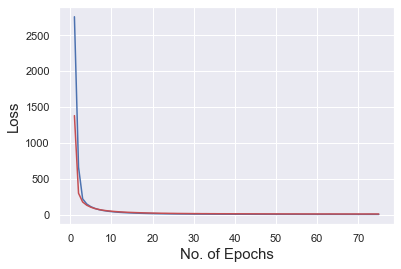

In [4]:
val_loss = hist.history["val_loss"][1:]
loss = hist.history["loss"][1:]
epochs = range(1, len(val_loss)+1)

plt.plot(epochs, loss, color = "b")
plt.plot(epochs, val_loss, color = "r")
plt.xlabel("No. of Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)

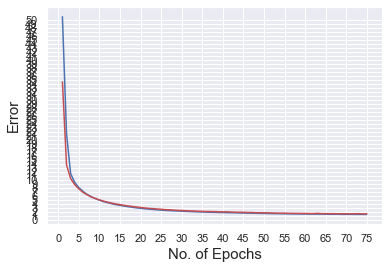

In [5]:
val_error = hist.history["val_mean_absolute_error"][1:]
training_error = hist.history["mean_absolute_error"][1:]
epochs = range(1, len(val_error)+1)

plt.plot(epochs, training_error, color = "b")
plt.plot(epochs, val_error, color = "r")
plt.yticks(np.arange(0, max(training_error), 1))
plt.xticks(np.arange(0, max(epochs)+1, 5))
plt.xlabel("No. of Epochs", fontsize=15)
plt.ylabel("Error", fontsize=15)
plt.show()

## Evaluating the model

In [6]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

1814/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [7]:
print ("Test Loss: {:.2f}, Expected Deviation for Prediction: {:.2f}".format(test_loss, test_accuracy))

Test Loss: 17.97, Expected Deviation for Prediction: 1.68
